In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
plt.rc('axes', labelsize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Reg File vs Traditional Microbenchmarks

## Loopback Latency / Throughput

In [3]:
path = 'results/loopback/'
lnic_latency = pd.read_csv(path + 'lnic_msg_len_latency.csv', index_col="msg_len").groupby('msg_len').median()/3.2
lnic_tput = pd.read_csv(path + 'lnic_msg_len_throughput.csv', index_col="msg_len")
icenic_latency = pd.read_csv(path + 'icenic_msg_len_latency.csv', index_col="msg_len").groupby('msg_len').median()/3.2
icenic_tput = pd.read_csv(path + 'icenic_msg_len_throughput.csv', index_col="msg_len")

<IPython.core.display.Javascript object>


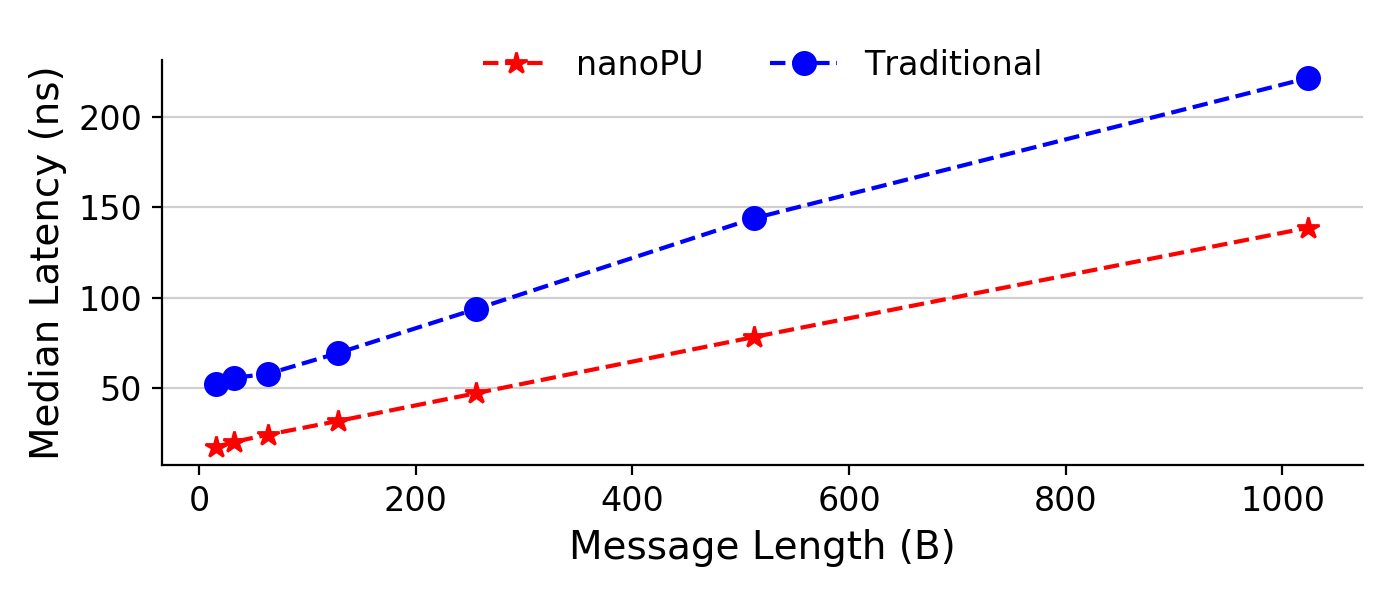

In [4]:
plt.figure(figsize=(7, 3))
ax = plt.gca()
lnic_latency['latency'].plot(ax=ax, color='r', linestyle='--', label='nanoPU', marker='*', markersize=8)
icenic_latency['latency'].plot(ax=ax, color='b', linestyle='--', label='Traditional', marker='o', markersize=8)
ax.set_ylabel('Median Latency (ns)')
ax.set_xlabel('Message Length (B)')
ax.legend(loc='upper center', frameon=False, ncol=2, bbox_to_anchor=(0.5, 1.1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(alpha=0.6)
plt.tight_layout()

# plt.title('Loopback Latency')
plt.show()

<IPython.core.display.Javascript object>


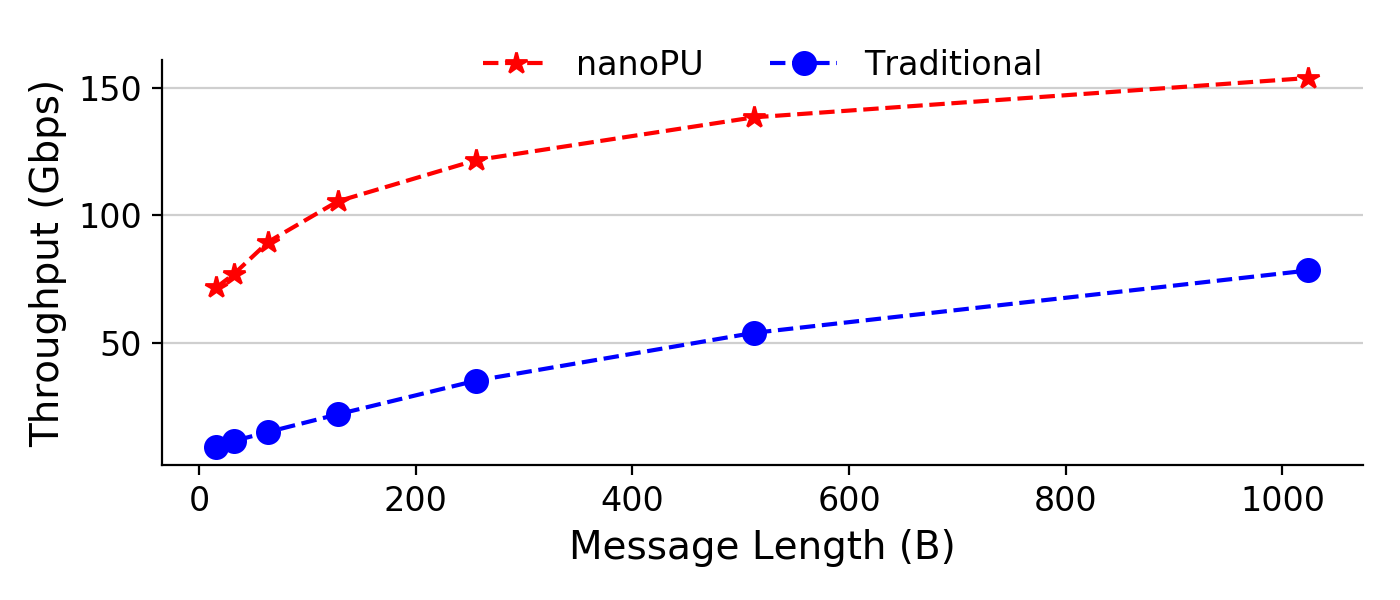

In [5]:
plt.figure(figsize=(7, 3))
ax = plt.gca()
lnic_tput['throughput'].plot(ax=ax, color='r', linestyle='--', label='nanoPU', marker='*', markersize=8)
icenic_tput['throughput'].plot(ax=ax, color='b', linestyle='--', label='Traditional', marker='o', markersize=8)
ax.set_ylabel('Throughput (Gbps)')
ax.set_xlabel('Message Length (B)')
ax.legend(loc='upper center', frameon=False, ncol=2, bbox_to_anchor=(0.5, 1.1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(alpha=0.6)
plt.tight_layout()

# plt.title('Loopback Throughput Speedup')
plt.show()

## Stateless Processing (a.k.a Stream)

In [6]:
path = 'results/stream/'
lnic_stream_tput = pd.read_csv(path + 'lnic_msg_len_throughput.csv', index_col="msg_len")
icenic_stream_tput = pd.read_csv(path + 'icenic_msg_len_throughput.csv', index_col="msg_len")

<IPython.core.display.Javascript object>


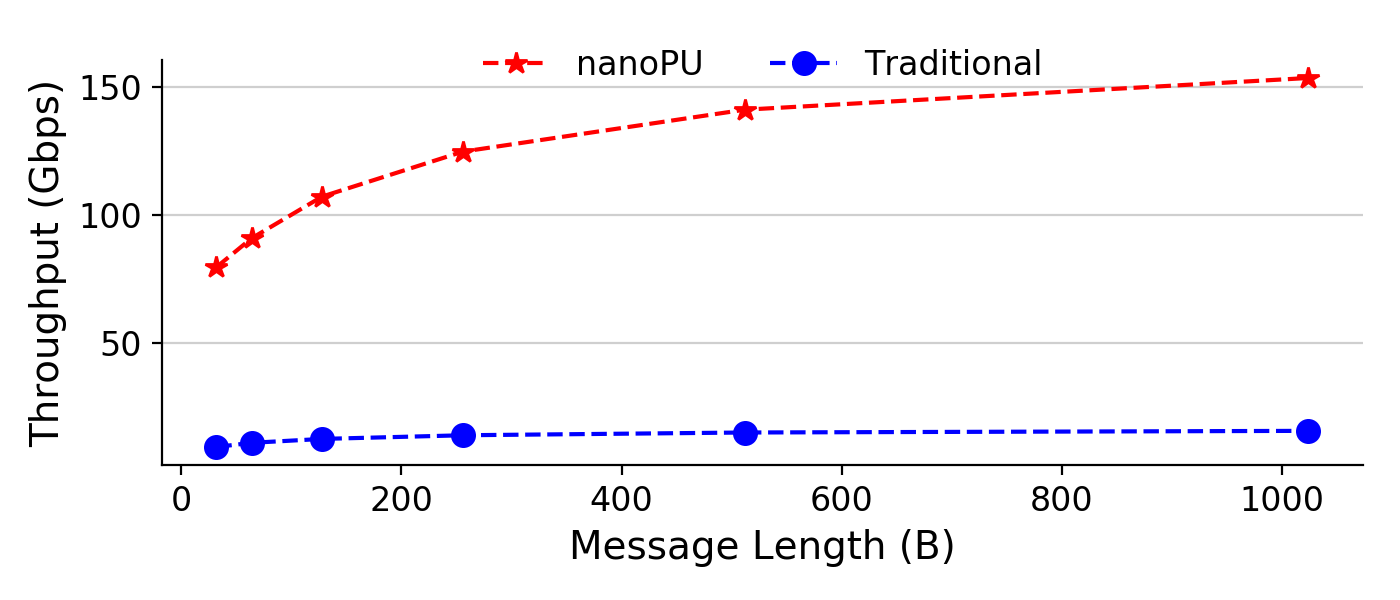

In [7]:
plt.figure(figsize=(7, 3))
ax = plt.gca()
lnic_stream_tput['throughput'].plot(ax=ax, color='r', linestyle='--', label='nanoPU', marker='*', markersize=8)
icenic_stream_tput['throughput'].plot(ax=ax, color='b', linestyle='--', label='Traditional', marker='o', markersize=8)
ax.set_ylabel('Throughput (Gbps)')
ax.set_xlabel('Message Length (B)')
ax.legend(loc='upper center', frameon=False, ncol=2, bbox_to_anchor=(0.5, 1.1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(alpha=0.6)
plt.tight_layout()

# plt.title('Stream Throughput Speedup')
plt.show()

## Dot Product

In [8]:
def preproc_dot_data(df):
    df.index = df.index*8
    df['throughput'] = 1.0/(df['latency']*0.3125e-3) # convert to Mrps
    return df

In [9]:
path = 'results/dot_product/'
lnic_opt_dot = preproc_dot_data(pd.read_csv(path + 'lnic_opt_num_words_latency.csv', index_col="num_words"))
lnic_naive_dot = preproc_dot_data(pd.read_csv(path + 'lnic_naive_num_words_latency.csv', index_col="num_words"))
icenic_dot = preproc_dot_data(pd.read_csv(path + 'icenic_num_words_latency.csv', index_col="num_words"))

In [10]:
dot_opt_speedup = lnic_opt_dot['throughput']/icenic_dot['throughput']
dot_naive_speedup = lnic_naive_dot['throughput']/icenic_dot['throughput']

<IPython.core.display.Javascript object>


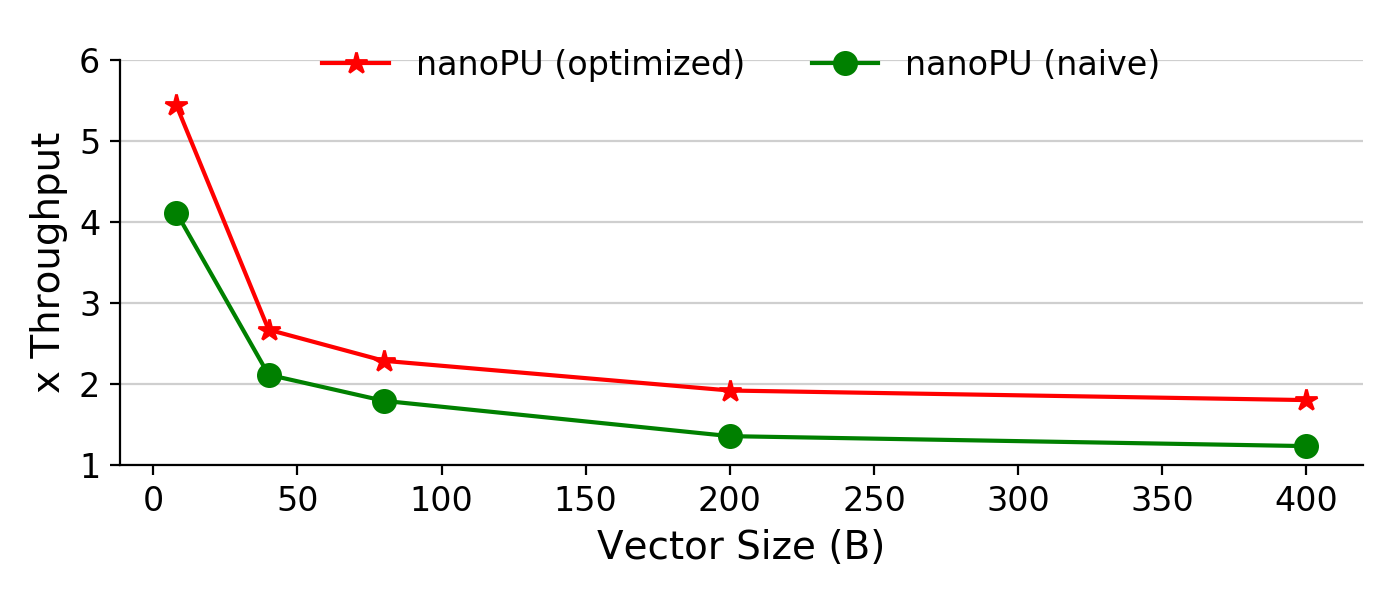

In [13]:
plt.figure(figsize=(7, 3))
ax = plt.gca()
dot_opt_speedup.plot(ax=ax, color='r', label='nanoPU (optimized)', marker='*', markersize=8)
dot_naive_speedup.plot(ax=ax, color='g', label='nanoPU (naive)', marker='o', markersize=8)
ax.set_ylabel('x Throughput')
ax.set_xlabel('Vector Size (B)')
ax.legend(loc='upper center', frameon=False, ncol=2, bbox_to_anchor=(0.5, 1.1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(alpha=0.6)
plt.tight_layout()
plt.ylim([1,6])

# plt.title('Dot Product Speedup')
plt.show()